In [80]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l1_l2


In [81]:
pkgo=pd.read_csv('./train.csv')

In [82]:
pkgo.head(10)

,ID,appearedTimeOfDay,appearedHour,appearedMinute,terrainType,closeToWater,city,continent,weather,temperature,windSpeed,pressure,weatherIcon,population_density,urban,suburban,midurban,rural,gymDistanceKm,gymIn100m,gymIn250m,gymIn500m,gymIn1000m,gymIn2500m,gymIn5000m,pokestopDistanceKm,pokestopIn100m,pokestopIn250m,pokestopIn500m,pokestopIn1000m,pokestopIn2500m,pokestopIn5000m,cooc_1,cooc_2,cooc_3,cooc_4,cooc_5,cooc_6,cooc_7,cooc_8,cooc_9,cooc_10,cooc_11,cooc_12,cooc_13,cooc_14,cooc_15,cooc_16,cooc_17,cooc_18,cooc_19,cooc_20,cooc_21,cooc_22,cooc_23,cooc_24,cooc_25,cooc_26,cooc_27,cooc_28,cooc_29,cooc_30,cooc_31,cooc_32,cooc_33,cooc_34,cooc_35,cooc_36,cooc_37,cooc_38,cooc_39,cooc_40,cooc_41,cooc_42,cooc_43,cooc_44,cooc_45,cooc_46,cooc_47,cooc_48,cooc_49,cooc_50,cooc_51,cooc_52,cooc_53,cooc_54,cooc_55,cooc_56,cooc_57,cooc_58,cooc_59,cooc_60,cooc_61,cooc_62,cooc_63,cooc_64,cooc_65,cooc_66,cooc_67,cooc_68,cooc_69,cooc_70,cooc_71,cooc_72,cooc_73,cooc_74,cooc_75,cooc_76,cooc_77,cooc_78,cooc_79,cooc_80,cooc_81,cooc_82,cooc_83,cooc_84,cooc_85,cooc_86,cooc_87,cooc_88,cooc_89,cooc_90,cooc_91,cooc_92,cooc_93,cooc_94,cooc_95,cooc_96,cooc_97,cooc_98,cooc_99,cooc_100,cooc_101,cooc_102,cooc_103,cooc_104,cooc_105,cooc_106,cooc_107,cooc_108,cooc_109,cooc_110,cooc_111,cooc_112,cooc_113,cooc_114,cooc_115,cooc_116,cooc_117,cooc_118,cooc_119,cooc_120,cooc_121,cooc_122,cooc_123,cooc_124,cooc_125,cooc_126,cooc_127,cooc_128,cooc_129,cooc_130,cooc_131,cooc_132,cooc_133,cooc_134,cooc_135,cooc_136,cooc_137,cooc_138,cooc_139,cooc_140,cooc_141,cooc_142,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,class
0,NzM4OTYzMzQxNTMyNzc1MDQ0NQ==,evening,19,10,13,False,Bangkok,Asia,Clear,27.8,9.00,1008.96,clear-day,6019.04440,True,True,True,False,0.523759,False,False,False,True,True,True,0.144120,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2
1,NDEwMjE0MzYwNzUyMjE2OTI0NQ==,night,5,19,13,True,New_York,America,Clear,26.1,8.70,1018.96,clear-night,0.00000,False,False,False,True,0.565267,False,False,False,True,True,True,0.198728,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,5
2,OTQ3NzU5MTA4MzgzODg2NzYxMw==,evening,19,46,0,True,New_York,America,Clear,24.7,16.82,1023.22,clear-day,0.00000,False,F

In [83]:
print('before set options :',pd.get_option('display.max_columns'))

#自定義選項，使columns能夠全盤顯示
pd.set_option('display.max_columns',pkgo.shape[1])
print('after set options :',pd.get_option('display.max_columns'))
pkgo.head(1)

before set options : 184
after set options : 184


,ID,appearedTimeOfDay,appearedHour,appearedMinute,terrainType,closeToWater,city,continent,weather,temperature,windSpeed,pressure,weatherIcon,population_density,urban,suburban,midurban,rural,gymDistanceKm,gymIn100m,gymIn250m,gymIn500m,gymIn1000m,gymIn2500m,gymIn5000m,pokestopDistanceKm,pokestopIn100m,pokestopIn250m,pokestopIn500m,pokestopIn1000m,pokestopIn2500m,pokestopIn5000m,cooc_1,cooc_2,cooc_3,cooc_4,cooc_5,cooc_6,cooc_7,cooc_8,cooc_9,cooc_10,cooc_11,cooc_12,cooc_13,cooc_14,cooc_15,cooc_16,cooc_17,cooc_18,cooc_19,cooc_20,cooc_21,cooc_22,cooc_23,cooc_24,cooc_25,cooc_26,cooc_27,cooc_28,cooc_29,cooc_30,cooc_31,cooc_32,cooc_33,cooc_34,cooc_35,cooc_36,cooc_37,cooc_38,cooc_39,cooc_40,cooc_41,cooc_42,cooc_43,cooc_44,cooc_45,cooc_46,cooc_47,cooc_48,cooc_49,cooc_50,cooc_51,cooc_52,cooc_53,cooc_54,cooc_55,cooc_56,cooc_57,cooc_58,cooc_59,cooc_60,cooc_61,cooc_62,cooc_63,cooc_64,cooc_65,cooc_66,cooc_67,cooc_68,cooc_69,cooc_70,cooc_71,cooc_72,cooc_73,cooc_74,cooc_75,cooc_76,cooc_77,cooc_78,cooc_79,cooc_80,cooc_81,cooc_82,cooc_83,cooc_84,cooc_85,cooc_86,cooc_87,cooc_88,cooc_89,cooc_90,cooc_91,cooc_92,cooc_93,cooc_94,cooc_95,cooc_96,cooc_97,cooc_98,cooc_99,cooc_100,cooc_101,cooc_102,cooc_103,cooc_104,cooc_105,cooc_106,cooc_107,cooc_108,cooc_109,cooc_110,cooc_111,cooc_112,cooc_113,cooc_114,cooc_115,cooc_116,cooc_117,cooc_118,cooc_119,cooc_120,cooc_121,cooc_122,cooc_123,cooc_124,cooc_125,cooc_126,cooc_127,cooc_128,cooc_129,cooc_130,cooc_131,cooc_132,cooc_133,cooc_134,cooc_135,cooc_136,cooc_137,cooc_138,cooc_139,cooc_140,cooc_141,cooc_142,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,class
0,NzM4OTYzMzQxNTMyNzc1MDQ0NQ==,evening,19,10,13,False,Bangkok,Asia,Clear,27.8,9.0,1008.96,clear-day,6019.0444,True,True,True,False,0.523759,False,False,False,True,True,True,0.14412,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2


In [84]:
pkgo.columns.values

array(['ID', 'appearedTimeOfDay', 'appearedHour', 'appearedMinute',
       'terrainType', 'closeToWater', 'city', 'continent', 'weather',
       'temperature', 'windSpeed', 'pressure', 'weatherIcon',
       'population_density', 'urban', 'suburban', 'midurban', 'rural',
       'gymDistanceKm', 'gymIn100m', 'gymIn250m', 'gymIn500m',
       'gymIn1000m', 'gymIn2500m', 'gymIn5000m', 'pokestopDistanceKm',
       'pokestopIn100m', 'pokestopIn250m', 'pokestopIn500m',
       'pokestopIn1000m', 'pokestopIn2500m', 'pokestopIn5000m', 'cooc_1',
       'cooc_2', 'cooc_3', 'cooc_4', 'cooc_5', 'cooc_6', 'cooc_7',
       'cooc_8', 'cooc_9', 'cooc_10', 'cooc_11', 'cooc_12', 'cooc_13',
       'cooc_14', 'cooc_15', 'cooc_16', 'cooc_17', 'cooc_18', 'cooc_19',
       'cooc_20', 'cooc_21', 'cooc_22', 'cooc_23', 'cooc_24', 'cooc_25',
       'cooc_26', 'cooc_27', 'cooc_28', 'cooc_29', 'cooc_30', 'cooc_31',
       'cooc_32', 'cooc_33', 'cooc_34', 'cooc_35', 'cooc_36', 'cooc_37',
       'cooc_38', 'cooc_39', '

In [85]:
y = to_categorical(pkgo['class'])
y[0:10]

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

In [86]:
num_cols = pkgo.shape[1]
pkgo = pkgo.iloc[:,1 :num_cols-1]

In [87]:
pkgo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Columns: 182 entries, appearedTimeOfDay to cooc_151
dtypes: bool(168), float64(6), int64(3), object(5)
memory usage: 1.9+ MB


In [88]:
le = preprocessing.LabelEncoder()
def trans(pkgo):
    i='a'
    for i in pkgo.columns.values:
            if pkgo[i].dtypes=='O':
                le.fit(pkgo[i].unique())
                pkgo[i] = le.transform(pkgo[i].values)
                set(pkgo[i])
            elif pkgo[i].dtypes==bool:
                pkgo[i] = pkgo[i].astype(int)
            elif pkgo[i].dtypes==float:
                scaler = MinMaxScaler()
                pkgo[i] = scaler.fit_transform(pkgo[i].values.reshape(-1, 1))
            elif pkgo[i].dtypes==int:
                scaler = MinMaxScaler()
                pkgo[i] = scaler.fit_transform(pkgo[i].values.reshape(-1, 1))
    return

In [89]:
trans(pkgo)
pkgo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Columns: 182 entries, appearedTimeOfDay to cooc_151
dtypes: float64(9), int64(173)
memory usage: 9.9 MB


In [90]:
x=pkgo
x.shape, y.shape

((7160, 182), (7160, 6))

In [94]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 35)

print(f'Training set--> X_train shape= {X_train.shape}, y_train shape= {y_train.shape}')
print(f'Holdout set--> X_test shape= {X_test.shape}, y_test shape= {y_test.shape}')

Training set--> X_train shape= (5728, 182), y_train shape= (5728, 6)
Holdout set--> X_test shape= (1432, 182), y_test shape= (1432, 6)


In [105]:
model = keras.Sequential()


model.add(layers.Dense(300, input_dim=X_train.shape[1],activation='relu',kernel_regularizer=l1_l2(l1=0.0005, l2=0)) )


model.add(layers.Dense(400,activation='relu',kernel_regularizer=l1_l2(l1=0.0005, l2=0)))


model.add(layers.Dense(6,activation='softmax',kernel_regularizer=l1_l2(l1=0.0005, l2=0)))


model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 300)               54900     
_________________________________________________________________
dense_85 (Dense)             (None, 400)               120400    
_________________________________________________________________
dense_86 (Dense)             (None, 6)                 2406      
Total params: 177,706
Trainable params: 177,706
Non-trainable params: 0
_________________________________________________________________


In [106]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['acc'])
batch_size = 10
epochs = 100
model_history \
    = model.fit(X_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,
                shuffle=True,
                validation_split=0.1)

Epoch 1/100
516/516 [==============================] - 1s 2ms/step - loss: 2.9753 - acc: 0.3193 - val_loss: 2.2634 - val_acc: 0.3805
Epoch 2/100
516/516 [==============================] - 1s 2ms/step - loss: 2.0783 - acc: 0.4043 - val_loss: 1.9642 - val_acc: 0.3822
Epoch 3/100
516/516 [==============================] - 1s 2ms/step - loss: 1.8472 - acc: 0.4275 - val_loss: 1.7399 - val_acc: 0.4538
Epoch 4/100
516/516 [==============================] - 1s 2ms/step - loss: 1.7088 - acc: 0.4483 - val_loss: 1.6631 - val_acc: 0.4450
Epoch 5/100
516/516 [==============================] - 1s 2ms/step - loss: 1.6180 - acc: 0.4634 - val_loss: 1.5912 - val_acc: 0.4485
Epoch 6/100
516/516 [==============================] - 1s 2ms/step - loss: 1.5579 - acc: 0.4797 - val_loss: 1.5406 - val_acc: 0.4625
Epoch 7/100
516/516 [==============================] - 1s 2ms/step - loss: 1.4986 - acc: 0.4947 - val_loss: 1.4713 - val_acc: 0.5009
Epoch 8/100
516/516 [==============================] - 1s 2ms/step - 

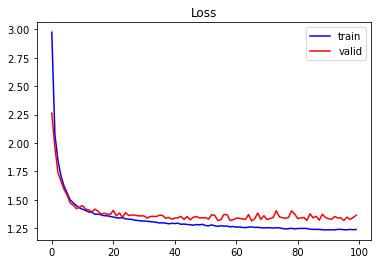

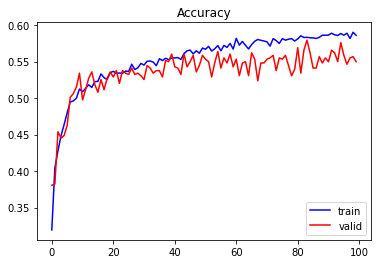

In [107]:
plt.plot(model_history.history['loss'], 'b', label='train')
plt.plot(model_history.history['val_loss'], 'r', label='valid')
plt.legend()
plt.title('Loss')
plt.show()

plt.plot(model_history.history['acc'], 'b', label='train')
plt.plot(model_history.history['val_acc'], 'r', label='valid')
plt.legend(loc=4)
plt.title('Accuracy')
plt.show()

In [124]:
test=pd.read_csv('./test.csv')
test.head()

,id,appearedTimeOfDay,appearedHour,appearedMinute,terrainType,closeToWater,city,continent,weather,temperature,windSpeed,pressure,weatherIcon,population_density,urban,suburban,midurban,rural,gymDistanceKm,gymIn100m,gymIn250m,gymIn500m,gymIn1000m,gymIn2500m,gymIn5000m,pokestopDistanceKm,pokestopIn100m,pokestopIn250m,pokestopIn500m,pokestopIn1000m,pokestopIn2500m,pokestopIn5000m,cooc_1,cooc_2,cooc_3,cooc_4,cooc_5,cooc_6,cooc_7,cooc_8,cooc_9,cooc_10,cooc_11,cooc_12,cooc_13,cooc_14,cooc_15,cooc_16,cooc_17,cooc_18,cooc_19,cooc_20,cooc_21,cooc_22,cooc_23,cooc_24,cooc_25,cooc_26,cooc_27,cooc_28,cooc_29,cooc_30,cooc_31,cooc_32,cooc_33,cooc_34,cooc_35,cooc_36,cooc_37,cooc_38,cooc_39,cooc_40,cooc_41,cooc_42,cooc_43,cooc_44,cooc_45,cooc_46,cooc_47,cooc_48,cooc_49,cooc_50,cooc_51,cooc_52,cooc_53,cooc_54,cooc_55,cooc_56,cooc_57,cooc_58,cooc_59,cooc_60,cooc_61,cooc_62,cooc_63,cooc_64,cooc_65,cooc_66,cooc_67,cooc_68,cooc_69,cooc_70,cooc_71,cooc_72,cooc_73,cooc_74,cooc_75,cooc_76,cooc_77,cooc_78,cooc_79,cooc_80,cooc_81,cooc_82,cooc_83,cooc_84,cooc_85,cooc_86,cooc_87,cooc_88,cooc_89,cooc_90,cooc_91,cooc_92,cooc_93,cooc_94,cooc_95,cooc_96,cooc_97,cooc_98,cooc_99,cooc_100,cooc_101,cooc_102,cooc_103,cooc_104,cooc_105,cooc_106,cooc_107,cooc_108,cooc_109,cooc_110,cooc_111,cooc_112,cooc_113,cooc_114,cooc_115,cooc_116,cooc_117,cooc_118,cooc_119,cooc_120,cooc_121,cooc_122,cooc_123,cooc_124,cooc_125,cooc_126,cooc_127,cooc_128,cooc_129,cooc_130,cooc_131,cooc_132,cooc_133,cooc_134,cooc_135,cooc_136,cooc_137,cooc_138,cooc_139,cooc_140,cooc_141,cooc_142,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151
0,MTA5MTEwOTYxMzM0NzA2NDEzNzM=,morning,8,26,13,False,Ljubljana,Europe,MostlyCloudy,16.8,2.69,1018.02,partly-cloudy-day,1573.44080,True,True,True,False,0.298720,False,False,True,True,True,True,0.012588,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,MTY0OTUyMTM2MDExMjg3MjczMjU=,night,2,35,13,True,Los_Angeles,America,PartlyCloudy,18.6,13.00,1009.17,partly-cloudy-day,4188.39100,True,True,True,False,0.212500,False,True,True,True,True,True,0.164427,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,MTQ0ODU1OTEzOTU1NTAyNzI4NjE=,night,0,5,0,True,New_York,America,PartlyCloudy,30.0,9.15,1016.55,partly-clo

In [114]:
pkgo_test = test.iloc[:,1 :]
pkgo_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1791 entries, 0 to 1790
Columns: 182 entries, appearedTimeOfDay to cooc_151
dtypes: bool(168), float64(6), int64(3), object(5)
memory usage: 489.9+ KB


In [115]:
trans(pkgo_test)
pkgo_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1791 entries, 0 to 1790
Columns: 182 entries, appearedTimeOfDay to cooc_151
dtypes: float64(9), int64(173)
memory usage: 2.5 MB


In [119]:
y_pred = model.predict(pkgo_test)
print(y_pred[:10,:])

[[2.27958187e-02 1.17052510e-01 8.12233090e-01 2.52125729e-02
  1.01176435e-02 1.25883445e-02]
 [7.19126780e-03 9.01790917e-01 8.85848403e-02 2.01196596e-03
  3.20462888e-04 1.00612400e-04]
 [5.60631216e-01 1.15508817e-01 5.63656129e-02 4.49853875e-02
  5.90338819e-02 1.63475111e-01]
 [1.13997506e-02 5.84572852e-02 6.09550113e-03 9.13353562e-01
  5.98655734e-03 4.70731501e-03]
 [2.39442158e-02 8.45654905e-02 3.97735894e-01 7.37066939e-02
  8.10222030e-02 3.39025468e-01]
 [1.08732320e-01 1.55903205e-01 1.94319338e-01 2.12995440e-01
  1.98135212e-01 1.29914537e-01]
 [6.42428398e-02 5.58271825e-01 3.48159373e-01 7.65796145e-03
  3.25771235e-03 1.84102841e-02]
 [1.01854846e-01 1.22018106e-01 2.45425671e-01 9.05018672e-02
  2.21862569e-01 2.18336940e-01]
 [8.72534588e-02 2.24337652e-01 6.30057812e-01 7.94541370e-03
  6.89626532e-03 4.35094386e-02]
 [2.03552082e-01 1.52704731e-01 9.83508825e-02 2.36680463e-01
  2.05647856e-01 1.03063986e-01]]


In [120]:
y_label = np.argmax(y_pred, axis=1) # 取機率值最高的類別當作預測結果
print(y_label[:10])

[2 1 0 3 2 3 1 2 2 3]


In [125]:
submission = pd.DataFrame()
submission['ID'] = test.id
submission['class'] = y_label
submission

,ID,class
0,MTA5MTEwOTYxMzM0NzA2NDEzNzM=,2
1,MTY0OTUyMTM2MDExMjg3MjczMjU=,1
2,MTQ0ODU1OTEzOTU1NTAyNzI4NjE=,0
3,MTY1ODg1MzEwNzYzNDUzMDUwNTM=,3
4,MTY0NTg2OTA5MTkzOTE2MTc1MTc=,2
...,...,...
1786,MTA5MTg5MTI0Mjc0NDU0NDY3ODE=,0
1787,MTgzODA5ODc2NDU1MDkxOTM4ODU=,2
1788,NzA4MTU3NDkyMzYwMzM2NzA2OQ==,1
1789,MjM5NzA0NzA4Nzc5MTUxNDcxNw==,2


In [126]:
submission.to_csv('submition.csv',index=False)